In [1]:
import hmvec as hm
import numpy as np
import matplotlib.pyplot as plt
import quicklens as ql
import tools as tls

plt.style.use('/Users/antonbaleatolizancos/Documents/Science/plt_styles/notebook.mplstyle')
%matplotlib inline

#Your theory spectra
cl_unl     = ql.spec.get_camb_scalcl()
cl_len     = ql.spec.get_camb_lensedcl()

# This should roughly match the cosmology in Nick's tSZ papers
cosmoParams = {'As':2.4667392631170437e-09,'ns':.96,'omch2':(0.25-.043)*.7**2,'ombh2':0.044*.7**2,'H0':70.}

IMPORT ERROR: /Users/antonbaleatolizancos/Software/Quicklens-with-fixes/quicklens/mpi.py (No module named 'pypar'). Could not load pbs or pypar. MPI will not be used.
IMPORT ERROR: /Users/antonbaleatolizancos/Software/Quicklens-with-fixes/quicklens/shts/__init__.py (No module named 'fsht'). Try running 'python setup.py install' or 'python setup.py build_ext --inplace' from the quicklens directory.








In [2]:
zs = np.linspace(0.07,3.,30)
ms = np.geomspace(2e11,5e15,30)
ks = np.geomspace(1e-4,10,1001)
hcos = hm.HaloModel(zs,ks,ms=ms, mass_function='tinker',params=cosmoParams,mdef='mean')

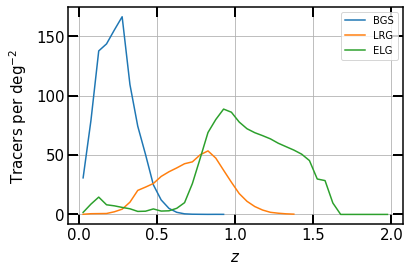

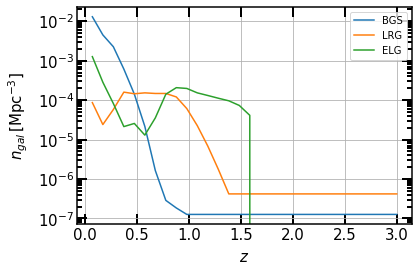

In [3]:
z_mean_BGS, surface_ngal_of_z_bgs = tls.get_DESI_surface_ngal_of_z('bgs')
z_mean_LRG, surface_ngal_of_z_lrg = tls.get_DESI_surface_ngal_of_z('lrg')
z_mean_ELG, surface_ngal_of_z_elg = tls.get_DESI_surface_ngal_of_z('elg')

plt.plot(z_mean_BGS, surface_ngal_of_z_bgs, label=r'BGS')
plt.plot(z_mean_LRG, surface_ngal_of_z_lrg, label=r'LRG')
plt.plot(z_mean_ELG, surface_ngal_of_z_elg, label=r'ELG')
plt.legend()
plt.xlabel(r'$z$')
plt.ylabel(r'Tracers per deg$^{-2}$')
plt.show()

# Interpolate DESI dndzs to the zs array used in hmvec
comov_ngal_bgs_persqdeg_interp = np.interp(zs, z_mean_BGS, tls.get_comoving_from_surface_ngal(z_mean_BGS, surface_ngal_of_z_bgs))
comov_ngal_lrg_persqdeg_interp = np.interp(zs, z_mean_LRG, tls.get_comoving_from_surface_ngal(z_mean_LRG, surface_ngal_of_z_lrg))
comov_ngal_elg_persqdeg_interp = np.interp(zs, z_mean_ELG, tls.get_comoving_from_surface_ngal(z_mean_ELG, surface_ngal_of_z_elg))

plt.semilogy(zs, comov_ngal_bgs_persqdeg_interp, label=r'BGS')
plt.semilogy(zs, comov_ngal_lrg_persqdeg_interp, label=r'LRG')
plt.semilogy(zs, comov_ngal_elg_persqdeg_interp, label=r'ELG')
plt.legend()
plt.xlabel(r'$z$')
plt.ylabel(r'$n_{gal}\, [\mathrm{Mpc}^{-3}]$')
plt.show()

In [4]:
# If you provide ngal, it needs to be the number density in Mpc^{-3} at each z
hcos.add_hod(name="DESI BGS", ngal=comov_ngal_bgs_persqdeg_interp) 
hcos.add_hod(name="DESI LRG", ngal=comov_ngal_lrg_persqdeg_interp) 
hcos.add_hod(name="DESI ELG", ngal=comov_ngal_elg_persqdeg_interp) 

# Alternatively, you can provide the minimum mass threshold at every z
#hcos.add_hod(name="built-in",mthresh=10**10.5+zs*0.)

# You can match the plot from Kravtsov in your thesis
#hcos.add_hod(name="kravtsov", ngal=5.86e-2*(74./100)**3 * np.ones_like(zs))

Bisection search converged in  20  iterations.
Bisection search converged in  20  iterations.


/Users/antonbaleatolizancos/Software/hmvec/hmvec/hmvec.py:994: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc
/Users/antonbaleatolizancos/Software/hmvec/hmvec/utils.py:23: RuntimeWarning: divide by zero encountered in true_divide
  mtol = (xnow-x)/x


Bisection search converged in  19  iterations.


/Users/antonbaleatolizancos/Software/hmvec/hmvec/utils.py:23: RuntimeWarning: invalid value encountered in true_divide
  mtol = (xnow-x)/x
/Users/antonbaleatolizancos/Software/hmvec/hmvec/hmvec.py:509: RuntimeWarning: invalid value encountered in true_divide
  return np.trapz(integrand,self.ms,axis=-1)/ngal


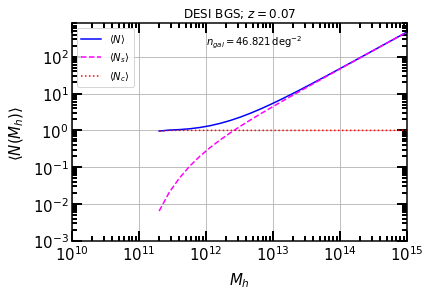

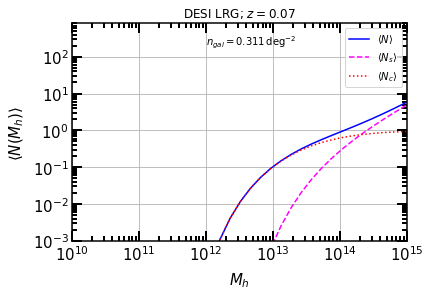

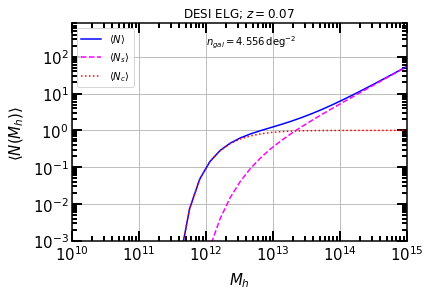

In [5]:
redshift_index = 0
hod_name = 'DESI BGS'

plt.loglog(ms, hcos.hods[hod_name]['Nc'][redshift_index,:] +  hcos.hods[hod_name]['Ns'][redshift_index,:], color='b', label=r'$\langle N\rangle$')
plt.loglog(ms, hcos.hods[hod_name]['Ns'][redshift_index,:], color='magenta', ls='--', label=r'$\langle N_s\rangle$')
plt.loglog(ms, hcos.hods[hod_name]['Nc'][redshift_index,:], color='r', ls=':', label=r'$\langle N_c\rangle$')
plt.xlim([1e10,1e15])
plt.ylim([0.001,800])
plt.xlabel(r'$M_{h}$')
plt.ylabel(r'$\langle N(M_{h})\rangle$')
plt.title(r'{}; $z={}$'.format(hod_name, zs[redshift_index]))
plt.annotate(r'$n_{gal}=$'+str(round(hcos.hods[hod_name]['ngal'][redshift_index]*3600, 3))+r'$\,\mathrm{deg}^{-2}$', [1e12, 2e2])
plt.legend()
plt.show()

hod_name = 'DESI LRG'
plt.loglog(ms, hcos.hods[hod_name]['Nc'][redshift_index,:] +  hcos.hods[hod_name]['Ns'][redshift_index,:], color='b', label=r'$\langle N\rangle$')
plt.loglog(ms, hcos.hods[hod_name]['Ns'][redshift_index,:], color='magenta', ls='--', label=r'$\langle N_s\rangle$')
plt.loglog(ms, hcos.hods[hod_name]['Nc'][redshift_index,:], color='r', ls=':', label=r'$\langle N_c\rangle$')
plt.xlim([1e10,1e15])
plt.ylim([0.001,800])
plt.xlabel(r'$M_{h}$')
plt.ylabel(r'$\langle N(M_{h})\rangle$')
plt.title(r'{}; $z={}$'.format(hod_name, zs[redshift_index]))
plt.annotate(r'$n_{gal}=$'+str(round(hcos.hods[hod_name]['ngal'][redshift_index]*3600, 3))+r'$\,\mathrm{deg}^{-2}$', [1e12, 2e2])
plt.legend()
plt.show()

hod_name = 'DESI ELG'
plt.loglog(ms, hcos.hods[hod_name]['Nc'][redshift_index,:] +  hcos.hods[hod_name]['Ns'][redshift_index,:], color='b', label=r'$\langle N\rangle$')
plt.loglog(ms, hcos.hods[hod_name]['Ns'][redshift_index,:], color='magenta', ls='--', label=r'$\langle N_s\rangle$')
plt.loglog(ms, hcos.hods[hod_name]['Nc'][redshift_index,:], color='r', ls=':', label=r'$\langle N_c\rangle$')
plt.xlim([1e10,1e15])
plt.ylim([0.001,800])
plt.xlabel(r'$M_{h}$')
plt.ylabel(r'$\langle N(M_{h})\rangle$')
plt.title(r'{}; $z={}$'.format(hod_name, zs[redshift_index]))
plt.annotate(r'$n_{gal}=$'+str(round(hcos.hods[hod_name]['ngal'][redshift_index]*3600, 3))+r'$\,\mathrm{deg}^{-2}$', [1e12, 2e2])
plt.legend()
plt.show()

Note that there are other properties you can easily query, like
```python
        self.hods[name]['Nc'] = Ncs
        self.hods[name]['Ns'] = Nss
        self.hods[name]['NsNsm1'] = NsNsm1
        self.hods[name]['NcNs'] = NcNs
        self.hods[name]['ngal'] = self.get_ngal(Ncs,Nss)
        self.hods[name]['bg'] = self.get_bg(Ncs,Nss,self.hods[name]['ngal'])
        self.hods[name]['satellite_profile'] = satellite_profile_name
        self.hods[name]['central_profile'] = central_profile_name
        self.hods[name]['log10mthresh'] = np.log10(mthresh[:,None])
```

In [111]:
pgg_1h = hcos.get_power_1halo(name=hod_name)
pgg_2h = hcos.get_power_2halo(name=hod_name)
Pgg = pgg_1h + pgg_2h

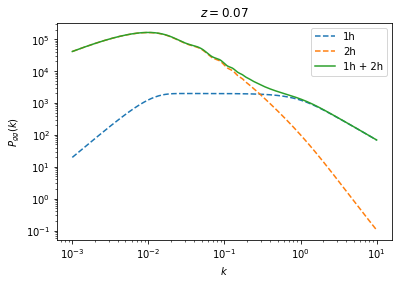

In [112]:
plt.loglog(ks, pgg_1h[redshift_index], ls='--', label=r'1h')
plt.loglog(ks, pgg_2h[redshift_index], ls='--', label=r'2h')
plt.loglog(ks, Pgg[redshift_index], label=r'1h + 2h')

plt.xlabel(r'$k$')
plt.ylabel(r'$P_{gg}(k)$')
plt.title(r'$z={}$'.format(zs[redshift_index]))
plt.legend()

# Lensing auto

In [7]:
pmm_1h = hcos.get_power_1halo("nfw", "nfw")
pmm_2h = hcos.get_power_2halo("nfw", "nfw")
Pmm = pmm_1h + pmm_2h

ells = np.linspace(2,3000,300)

Cls = hcos.C_kk(ells,hcos.zs,hcos.ks,Pmm,lzs1=1100,lzs2=1100.)

The lensing auto comes out low relative to camb, but this to be expected because we are only integrating up to a moderate redshift

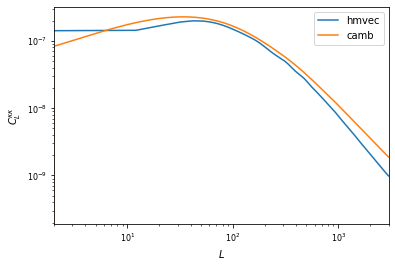

In [114]:
scaling = 1#(ells**4 / (2*np.pi))

plt.plot(ells, scaling * Cls, label='hmvec')
plt.plot(cl_unl.ls, cl_unl.clpp*(cl_unl.ls+1)**2 * cl_unl.ls**2 /4., label='camb')
plt.xlabel(r'$L$')
plt.ylabel(r'$C^{\kappa \kappa}_L$')

plt.xscale('log')
plt.yscale('log')


plt.xlim([2, 3000])
#plt.ylim([1e-10, 1e-2])
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.legend()

# Cross with lensing

In [24]:
hod_name = 'DESI LRG'

pgm_1h = hcos.get_power_1halo("nfw",hod_name)
pgm_2h = hcos.get_power_2halo("nfw",hod_name)
Pgm = pgm_1h + pgm_2h

ells = np.linspace(2,3000,300)
Cls = hcos.C_kg(ells,zs,ks,Pgm,gzs=z_mean_LRG, gdndz=surface_ngal_of_z_lrg,lzs=1100.) #hcos.C_kg(ells,zs,ks,Pgm,gzs=0.8,lzs=1100.)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


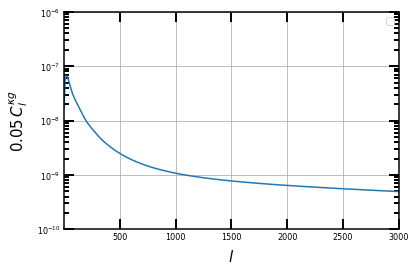

In [25]:
plt.plot(ells, 0.05  * Cls)
plt.xlabel(r'$l$')
plt.ylabel(r'$0.05 \, C^{\kappa g}_l$')

plt.yscale('log')
plt.xlim([2, 3000])
plt.ylim([1e-10, 1e-6])
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.legend()